# MLP Univariate

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import keras
from keras.backend import sigmoid
from keras.models import Sequential
from keras import models, layers, backend, optimizers
from keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import time
from math import sqrt

Using TensorFlow backend.


In [2]:
# we read our dataframe and assign the time column as the index values of the dataframe
file = "./DATA/Merged.csv"
df = pd.read_csv(file, index_col='Date', parse_dates=True)
df.head()

,AUD,EUR,NZD,GBP,BRL,CAD,CNY,DKK,HKD,INR,...,CHF,TWD,THB,VEB,gdpGBP,gdpUSD,GBR_Value,USA_Value,liborGBP,liborUSD
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,0.5592,0.9465,0.4432,1.4977,1.938,1.4963,8.2779,7.8845,7.8000,46.74,...,1.6075,33.000,43.79,0.7008,99.977643,100.815277,-1.815904,-4.084297,5.81094,6.65125
2001-01-03,0.5635,0.9473,0.4463,1.5045,1.946,1.4982,8.2773,7.8750,7.8000,46.75,...,1.6025,33.078,43.70,0.7002,99.980866,100.807191,-1.824859,-4.076654,6.09750,6.65375
2001-01-04,0.5655,0.9448,0.4457,1.4930,1.938,1.4985,8.2781,7.8991,7.7998,46.78,...,1.6115,33.000,43.53,0.6994,99.984089,100.799105,-1.833815,-4.069010,5.57125,6.09625
2001-01-05,0.5712,0.9535,0.4518,1.4990,1.953,1.5003,8.2775,7.8260,7.7993,46.76,...,1.6025,32.927,43.26,0.6988,99.987312,100.791019,-1.842770,-4.061367,5.37813,6.01625
2001-01-08,0.5660,0.9486,0.4505,1.4969,1.954,1.4944,8.2778,7.8705,7.7998,46.73,...,1.6076,32.850,42.95,0.6990,99.990535,100.782933,-1.851726,-4.053723,5.50000,6.01500


In [3]:
def CreateLaggedSequence(data, lag):
    # make two lists for PredictorSequences and ResponseVariables
    PredictorSequences, ResponseVariables = list(), list()
    for i in range(len(data)):
        # mark the range of the sequence
        end_i = i + lag
        # check when the data ends
        if end_i+1 > len(data):
            # stop sequence creation
            break
        # get the predictors and responses
        PredictorSequence = data[i:end_i]
        ResponseVariable = data[end_i]
        # append them to the lists
        PredictorSequences.append(PredictorSequence)
        ResponseVariables.append(ResponseVariable)
        # print(end_i)
    return np.array(PredictorSequences), np.array(ResponseVariables)

In [4]:
# Get the univariate series
X = df['GBP']
np_X = np.array(X)
# Create the lagged values for the series (50 lags)
X, y = CreateLaggedSequence(np_X, 50)
lag = X.shape[1]
# Reshape it for the process
X = X.reshape(X.shape[0], X.shape[1]) 
X.shape, y.shape, len(X), len(y)

((4870, 50), (4870,), 4870, 4870)

In [5]:
# split the train and test sets (last 50 observation spared for the test)
x_train, x_test = X[:-50], X[-50:]
y_train, y_test = y[:-50], y[-50:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4820, 50), (50, 50), (4820,), (50,))

In [6]:
# Define a new activation function
# Nerds, R. (2018, August 19). Swish Activation Function by Google. Retrieved from https://medium.com/@neuralnets/swish-activation-function-by-google-53e1ea86f820

def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [7]:
# create a start point for timer
start = time.time()

# design the model
backend.clear_session()
model = models.Sequential()

model.add(layers.Dense(3*2**8, activation = 'swish', kernel_initializer='he_uniform', input_shape = (x_train.shape[1],)))
model.add(layers.Dense(3*2**6, activation='swish', kernel_initializer='he_uniform'))
model.add(layers.Dense(3*2**7, activation='swish', kernel_initializer='he_uniform'))
model.add(layers.Dense(3*2**5, activation='swish', kernel_initializer='he_uniform'))
model.add(layers.Dense(3*2**6, activation='swish', kernel_initializer='he_uniform'))
model.add(layers.Dense(3*2**4, activation='swish', kernel_initializer='he_uniform'))
model.add(layers.Dense(3*2**5, activation='swish', kernel_initializer='he_uniform'))
model.add(layers.Dense(3*2**3, activation='swish', kernel_initializer='he_uniform'))
model.add(layers.Dense(3*2**4, activation='swish', kernel_initializer='he_uniform'))
model.add(layers.Dense(3*2**2, activation='swish', kernel_initializer='he_uniform'))
model.add(layers.Dense(3*2**3, activation='swish', kernel_initializer='he_uniform'))
model.add(layers.Dense(3*2**1, activation='swish', kernel_initializer='he_uniform'))
model.add(layers.Dense(3*2**2, activation='swish', kernel_initializer='he_uniform'))
model.add(layers.Dense(3*2**0, activation=tf.keras.backend.sin, kernel_initializer='he_uniform'))
model.add(layers.Dense(3*2**1, activation='swish', kernel_initializer='he_uniform'))

model.add(layers.Dense(1, activation='swish'))
# compile the model
model.compile(optimizer = optimizers.Adam(lr=0.00011), loss = 'mse', metrics = ['mae'])
#get the summary of the model
model.summary()

################################################################################

# fit the model
history = model.fit(x_train, y_train, 
            epochs = 2**10, 
            batch_size = 3856, 
            validation_split = 0.20, # sparing validation data from the training data
            verbose = 1, 
            callbacks=[EarlyStopping(monitor='val_mae', patience=2**9,)])

#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

# end the timer and print the total time passed
end = time.time()
print("Total time:", end-start, "seconds")

 6.0431e-04 - val_mae: 0.0206
Epoch 890/1024
3856/3856 [==============================] - 0s 18us/step - loss: 8.8267e-04 - mae: 0.0216 - val_loss: 5.9374e-04 - val_mae: 0.0203
Epoch 891/1024
3856/3856 [==============================] - 0s 17us/step - loss: 8.8021e-04 - mae: 0.0216 - val_loss: 5.8376e-04 - val_mae: 0.0201
Epoch 892/1024
3856/3856 [==============================] - 0s 19us/step - loss: 8.7775e-04 - mae: 0.0216 - val_loss: 5.7372e-04 - val_mae: 0.0199
Epoch 893/1024
3856/3856 [==============================] - 0s 19us/step - loss: 8.7531e-04 - mae: 0.0215 - val_loss: 5.6370e-04 - val_mae: 0.0197
Epoch 894/1024
3856/3856 [==============================] - 0s 16us/step - loss: 8.7287e-04 - mae: 0.0215 - val_loss: 5.5426e-04 - val_mae: 0.0195
Epoch 895/1024
3856/3856 [==============================] - 0s 18us/step - loss: 8.7043e-04 - mae: 0.0215 - val_loss: 5.4446e-04 - val_mae: 0.0193
Epoch 896/1024
3856/3856 [==============================] - 0s 18us/step - loss: 8.6800e

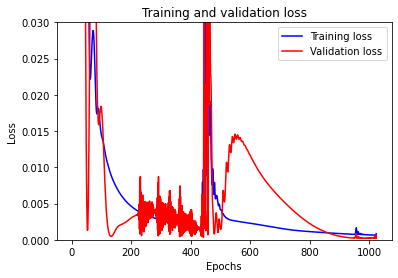

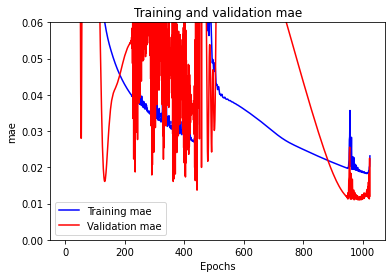

In [8]:
# get the history of the fitting process
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)
# plot the training and validation losses
plt.plot(epochs, loss_values, label = 'Training loss', color='blue')
plt.plot(epochs, val_loss_values, label = 'Validation loss', color='red')
plt.ylim(0,0.03)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plot the training and validation mae (mean absolute error)
plt.plot(epochs, mae_values, label = 'Training mae', color='blue')
plt.plot(epochs, val_mae_values, label = 'Validation mae', color='red')
plt.ylim(0,0.06)
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [9]:
# predict the model on the test set
yhat = model.predict(x_test, verbose=1)

50/50 [==============================] - 0s 2ms/step


In [10]:
# convert the predictions series
predictions = pd.Series(yhat.reshape((50)), index=df['GBP'].index[-50:])
# extract the actual values
actuals = df['GBP'][-50:]

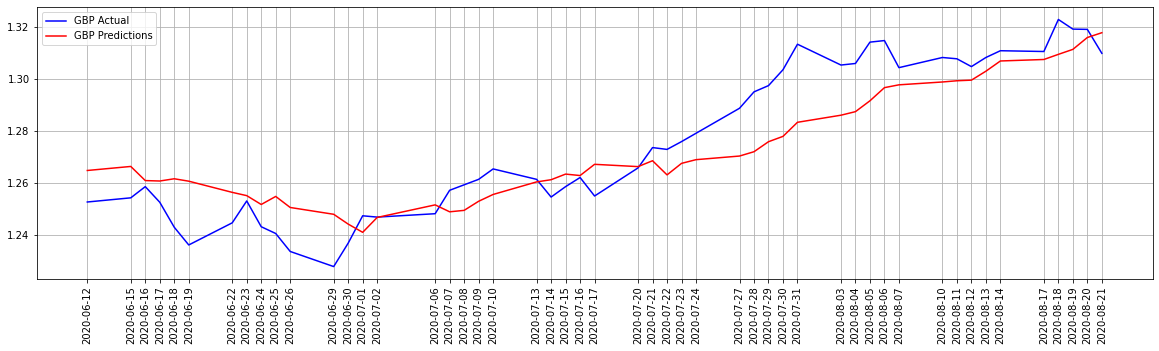

Test RMSE: 0.01295


In [11]:
# evaluate forecasts and plot them together
plt.figure(figsize=(20,5))
plt.plot(actuals.index, actuals, color='blue')
plt.plot(actuals.index, predictions, color='red')
plt.legend(('GBP Actual', 'GBP Predictions'))
plt.xticks(actuals.index, rotation=90)
plt.grid(True)
plt.show()

rmse = sqrt(mean_squared_error(actuals, predictions))
print('Test RMSE: %.5f' % rmse)